# Pokemon Trainers of Western PA. This is your guide to finding pokemon in and around the city of Pittsburgh.

Pokemon Trainers have come together to show new, or new to the area, Pokemon trainers where they can find Grass, Water, and Fire type Pokemon.  

In [1]:
import pandas as pd
import geopandas
import matplotlib.pyplot as plt
%matplotlib inline

# Grass type Pokemon

In [2]:
parks_df = pd.read_csv("City Parks.csv")

Below is a list of the top 5 and bottom 5 neighborhoods to find grass type Pokemon

In [115]:
parks_count = parks_df.groupby("neighborhood")['name'].count().reset_index()
parks_count.columns = ['Neighborhood', 'Number of Parks']
parks_count = parks_count.sort_values(by='Number of Parks', ascending=False)
print(parks_count)

                 Neighborhood  Number of Parks
22               East Liberty               12
13  Central Business District               10
5                   Beechview                8
57          South Side Slopes                7
50               Point Breeze                7
..                        ...              ...
9                     Bon Air                1
14      Central Lawrenceville                1
60        Squirrel Hill North                1
62            Stanton Heights                1
72                    Windgap                1

[73 rows x 2 columns]


<Axes: >

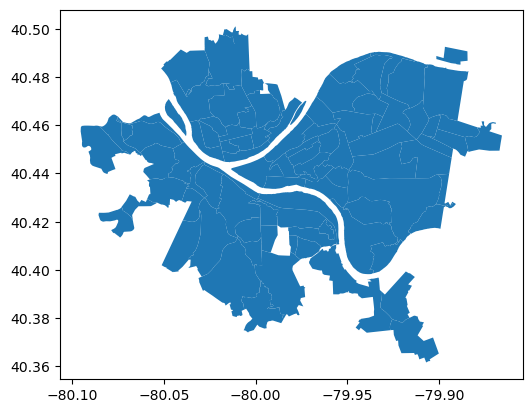

In [5]:
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp") 
neighborhoods.plot()

In [6]:
parks_map = neighborhoods.merge(parks_count, how='left', left_on='hood', right_on='Neighborhood')
parks_map[['hood','Number of Parks','geometry']].head()

,hood,Number of Parks,geometry
0,Central Oakland,4.0,"POLYGON ((-79.95304 40.44203, -79.95302 40.442..."
1,North Oakland,1.0,"POLYGON ((-79.95455 40.45882, -79.95427 40.458..."
2,West Oakland,1.0,"POLYGON ((-79.9623 40.44294, -79.9622 40.44289..."
3,Crawford-Roberts,3.0,"POLYGON ((-79.98275 40.44641, -79.98273 40.446..."
4,Strip District,2.0,"POLYGON ((-79.97494 40.45629, -79.97484 40.456..."


Below is a map of Pittsburgh showing on a green coloured scale where the most Grass type Pokemon should be found 

<Axes: >

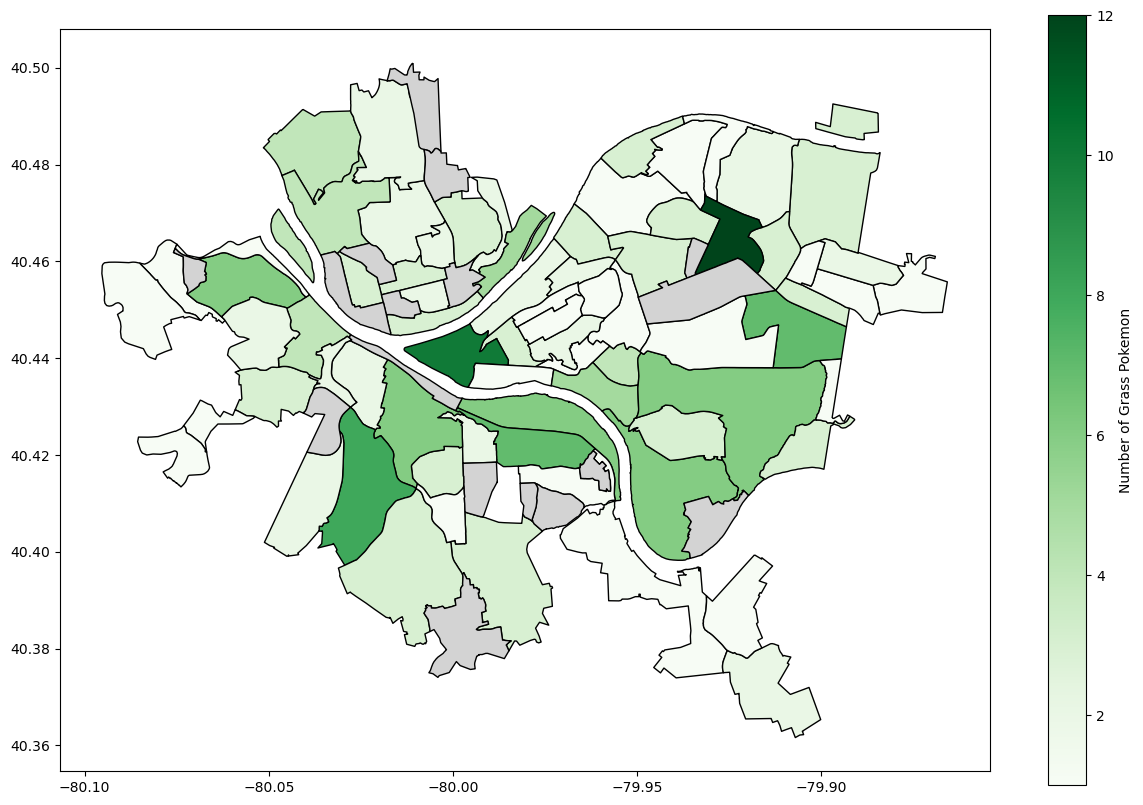

In [7]:
parks_map.plot(column='Number of Parks', 
               cmap='Greens',              
               edgecolor="black",       
               legend=True,              
               legend_kwds={'label': "Number of Grass Pokemon"}, 
               figsize=(15, 10),         
               missing_kwds={"color": "lightgrey"} 
               )

# Water Type Pokemon

Water Type Pokemon are found anywhere water is. Pittsburgh is also known as "The city of bridges" because of all the bridges mostly over our rivers. We were able to take use public water features as our base metric, and then addded +20 to the metric for all neighborhoods that border on the the 3 rivers 

In [8]:
waterfeatures_df = pd.read_csv("Pittsburgh Water Features.csv")

In [107]:
WF_count = waterfeatures_df.groupby("neighborhood")['name'].count().reset_index()
WF_count.columns = ['Neighborhood', 'Water Features']
WF_count = WF_count.sort_values(by='Water Features', ascending=False)
print(WF_count)

           Neighborhood  Water Features
55  Squirrel Hill South              14
26        Highland Park              12
10            Brookline               8
6            Bloomfield               8
59      Terrace Village               8
..                  ...             ...
40              Oakwood               1
28        Homewood West               1
21             Fineview               1
14    Central Northside               1
52        Spring Garden               1

[66 rows x 2 columns]


In [108]:
neighborhoods_to_update = [ "Lincoln-Lemington-Belmar", "Highland Park", "Morningside", "Upper Lawrenceville",
"Central Lawrenceville", "Lower Lawrenceville", "Herrs Island", "Strip District",
"Central Business District", "Troy Hill", "North Shore", "Chateau", "Marshall-Shadeland","Brighton Height",
"Brunot Island", "Esplen", "Elliott", "South Shore", "South Side Flats",
"Hays", "Bluff", "South Oakland", "Hazelwood", "Squirrel Hill South", "Glen Hazel", "Swisshelm Park"]
 
for hood in neighborhoods_to_update:
    if hood in WF_count['Neighborhood'].values:
        WF_count.loc[WF_count['Neighborhood'] == hood, 'Water Features'] += 50
    else:
        WF_count = pd.concat([WF_count, pd.DataFrame({'Neighborhood': [hood], 'Water Features': [20]})])

WF_count = WF_count.sort_values(by='Water Features', ascending=False).reset_index(drop=True)

print(WF_count)

           Neighborhood  Water Features
0   Squirrel Hill South              64
1         Highland Park              62
2             Troy Hill              56
3               Elliott              56
4      South Side Flats              55
..                  ...             ...
69              Oakwood               1
70        Homewood West               1
71             Fineview               1
72    Central Northside               1
73        Spring Garden               1

[74 rows x 2 columns]


In [109]:
WF_map = neighborhoods.merge(WF_count, how='left', left_on='hood', right_on='Neighborhood')
WF_map[['hood','Water Features','geometry']].head()

,hood,Water Features,geometry
0,Central Oakland,2.0,"POLYGON ((-79.95304 40.44203, -79.95302 40.442..."
1,North Oakland,3.0,"POLYGON ((-79.95455 40.45882, -79.95427 40.458..."
2,West Oakland,NaN,"POLYGON ((-79.9623 40.44294, -79.9622 40.44289..."
3,Crawford-Roberts,3.0,"POLYGON ((-79.98275 40.44641, -79.98273 40.446..."
4,Strip District,51.0,"POLYGON ((-79.97494 40.45629, -79.97484 40.456..."


<Axes: >

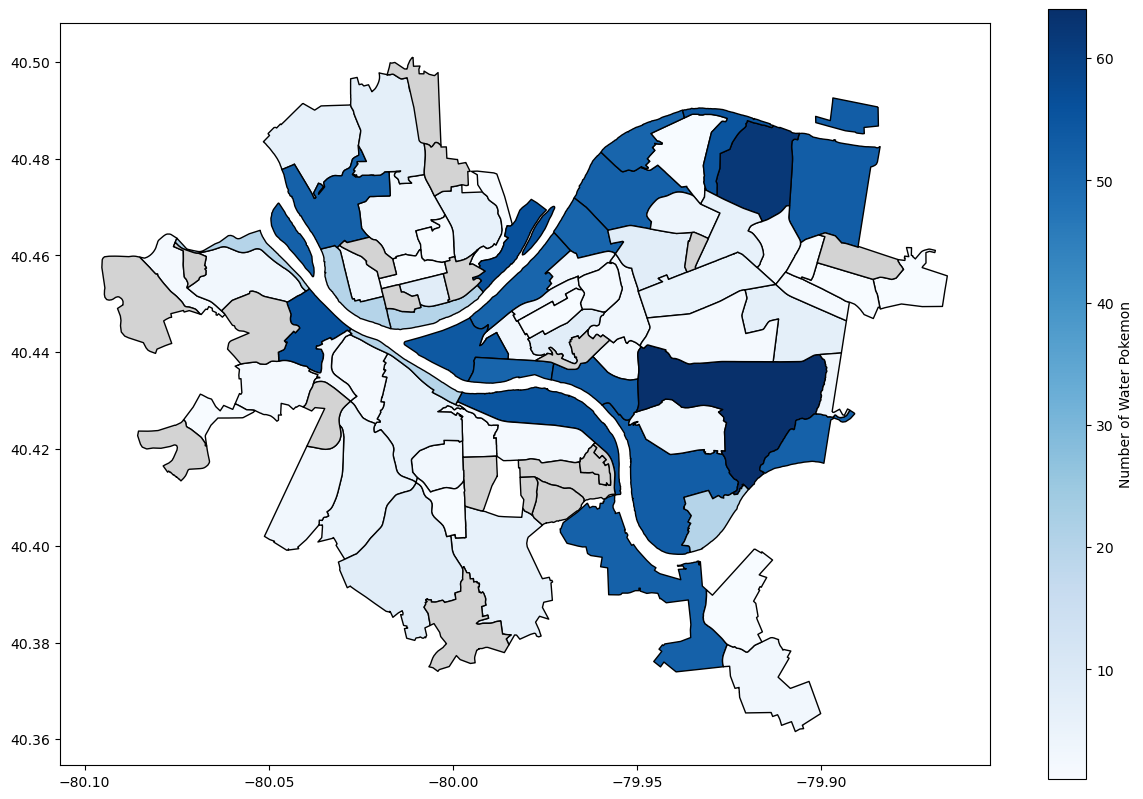

In [110]:
WF_map.plot(column='Water Features', 
               cmap='Blues',              
               edgecolor="black",       
               legend=True,              
               legend_kwds={'label': "Number of Water Pokemon"}, 
               figsize=(15, 10),         
               missing_kwds={"color": "lightgrey"} 
               )

# Fire type Pokemon 

Fire Type Pokémon are natively found around volcanos, but they can be found in most urban areas as well. 

In [76]:
fire_csv = "https://data.wprdc.org/datastore/dump/8d76ac6b-5ae8-4428-82a4-043130d17b02"
fire_data = pd.read_csv(fire_csv)
fire_data.head()

,_id,call_no,incident_type,type_description,address,alarms,alarm_time,primary_unit,census_tract,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,1,F160029985,111.0,Building fire,"800 BLOCK CENTER ST, WILKINSBURG PA 15221",1,2016-04-21T05:01:04,231EN16,NaN,NaN,NaN,NaN,4.200356e+10,NaN,NaN,NaN,3-16,40.441275,-79.882485
1,2,F180022058,111.0,Building fire,"1100 BLOCK JANE ST, WILKINSBURG PA 15221",1,2018-03-13T08:34:43,231EN16,NaN,NaN,NaN,NaN,4.200356e+10,NaN,NaN,NaN,3-21,40.436342,-79.881003
2,3,F180022102,131.0,Passenger vehicle fire,"SB STATE HWY 28 SB AT 31S, PITTSBURGH PA 15212",0,2018-03-13T11:54:23,231EN32,2406.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1-1A,NaN,NaN
3,4,F170043431,131.0,Passenger vehicle fire,"1700 BLOCK BELLEAU DR, PITTSBURGH PA 15212",0,2017-05-31T08:39:47,231EN38,2509.0,Fineview,6.0,25.0,4.200325e+10,1.0,25.0,1.0,1-10,40.460303,-80.006980
4,5,F180021111,111.0,Building fire,"2400 BLOCK VILLAGE RD, PITTSBURGH PA 15205",1,2018-03-09T10:26:42,231EN31,2808.0,Fairywood,2.0,28.0,4.200356e+10,5.0,28.0,6.0,1-16,40.449009,-80.076607


In [120]:
fire_counts = fire_data.groupby("neighborhood")['address'].count().reset_index()
fire_counts.columns = ['Neighborhood', 'Fires']
fire_counts = fire_counts.sort_values(by='Fires', ascending=False)
print(fire_counts)

                 Neighborhood  Fires
15                    Carrick    318
72           South Side Flats    304
16  Central Business District    297
77        Squirrel Hill South    273
38                  Hazelwood    262
..                        ...    ...
54                 Mt. Oliver     12
67                  Ridgemont     12
26              East Carnegie     11
66              Regent Square      9
52       Mount Oliver Borough      7

[91 rows x 2 columns]


In [89]:
Fire_map = neighborhoods.merge(fire_counts, how='left', left_on='hood', right_on='Neighborhood')
Fire_map[['hood', 'Fires', 'geometry']].head()

,hood,Fires,geometry
0,Central Oakland,101,"POLYGON ((-79.95304 40.44203, -79.95302 40.442..."
1,North Oakland,136,"POLYGON ((-79.95455 40.45882, -79.95427 40.458..."
2,West Oakland,65,"POLYGON ((-79.9623 40.44294, -79.9622 40.44289..."
3,Crawford-Roberts,116,"POLYGON ((-79.98275 40.44641, -79.98273 40.446..."
4,Strip District,79,"POLYGON ((-79.97494 40.45629, -79.97484 40.456..."


<Axes: >

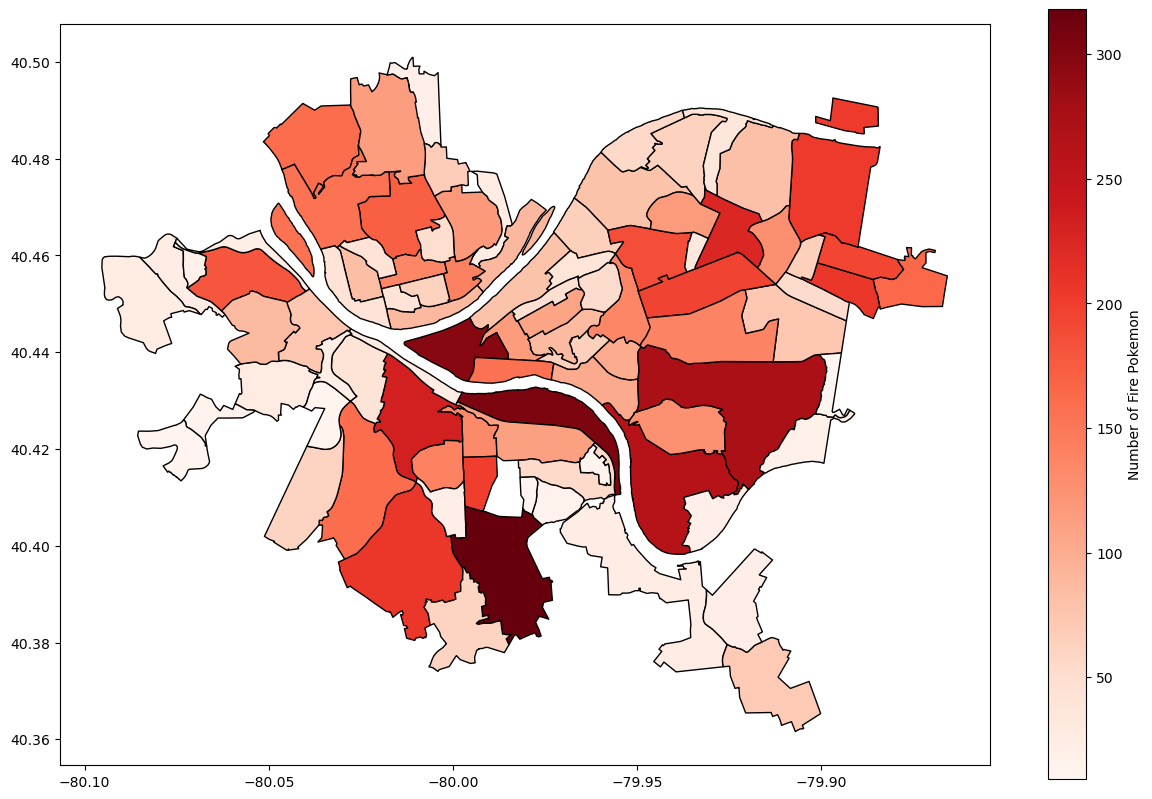

In [90]:
Fire_map.plot(column='Fires', 
               cmap='Reds',              
               edgecolor="black",       
               legend=True,              
               legend_kwds={'label': "Number of Fire Pokemon"}, 
               figsize=(15, 10),         
               missing_kwds={"color": "lightgrey"} 
               )

# Where to catch them all! 

So now that we have isolated type by neighborhood, lets bring all these together to give us a Blue, Green, and Red map of the Pittsburgh Neighborhoods

First what we will do, is add weights to the data. This is to even out the distrubution to the most logical. Fire Pokemon sometimes create multiple fires, so to prevent them from represetning too much land, we will add a -250 modifier to the river bordering neighborhoods. 

In [121]:
neighborhoods_to_update = [ "Lincoln-Lemington-Belmar", "Highland Park", "Morningside", "Upper Lawrenceville",
"Central Lawrenceville", "Lower Lawrenceville", "Herrs Island", "Strip District",
"Central Business District", "Troy Hill", "North Shore", "Chateau", "Marshall-Shadeland","Brighton Height",
"Brunot Island", "Esplen", "Elliott", "South Shore", "South Side Flats",
"Hays", "Bluff", "South Oakland", "Hazelwood", "Squirrel Hill South", "Glen Hazel", "Swisshelm Park"]
 
fire_counts.loc[fire_counts['Neighborhood'].isin(neighborhoods_to_update),'Fires'] -= 300

fire_count = fire_counts.sort_values(by='Fires', ascending=False)

print(fire_counts)

                 Neighborhood  Fires
15                    Carrick    318
72           South Side Flats      4
16  Central Business District     -3
77        Squirrel Hill South    -27
38                  Hazelwood    -38
..                        ...    ...
54                 Mt. Oliver     12
67                  Ridgemont     12
26              East Carnegie     11
66              Regent Square      9
52       Mount Oliver Borough      7

[91 rows x 2 columns]


Then, for grass type pokemon, since they are also found in yards, treees, and bushes, so we will add a +250 modifier to a select set of neighborhoods. 

In [116]:
neighborhoods_to_update = ["Highland Park", "Shadyside", "Perry North", "Summer Hill", "Northview Heights",
    "Point Breeze", "Squirrel Hill North","Squirrel Hill South", "Fairywood", "Windgap", "Sheraden",
    "Oakwood", "Brookline", "Overbrook", "Lincoln Place", "Regent Square"]

parks_count.loc[parks_count['Neighborhood'].isin(neighborhoods_to_update),'Number of Parks'] += 100

parks_count = parks_count.sort_values(by='Number of Parks', ascending=False)

print(parks_count)

           Neighborhood  Number of Parks
50         Point Breeze              107
61  Squirrel Hill South              106
54             Sheraden              106
11            Brookline              103
36        Lincoln Place              102
..                  ...              ...
45        North Oakland                1
33       Homewood South                1
34        Homewood West                1
24               Esplen                1
29                 Hays                1

[73 rows x 2 columns]


And now with our weighted modifiers added, lets combine all 3 dataframes into 1.

In [122]:
combined_data = parks_count.merge(fire_counts, on='Neighborhood', how='outer').merge(WF_count, on='Neighborhood', how='outer')
print(combined_data)

            Neighborhood  Number of Parks  Fires  Water Features
0           Point Breeze            107.0   73.0             7.0
1    Squirrel Hill South            106.0  -27.0            64.0
2               Sheraden            106.0  180.0             3.0
3              Brookline            103.0  206.0             8.0
4          Lincoln Place            102.0   71.0             3.0
..                   ...              ...    ...             ...
89             Ridgemont              NaN   12.0             NaN
90  Mount Oliver Borough              NaN    7.0             NaN
91          Herrs Island              NaN    NaN            20.0
92         Brunot Island              NaN    NaN            20.0
93       Brighton Height              NaN    NaN            20.0

[94 rows x 4 columns]


Now that we got all 3 dataframes into 1 we need to assign which neighborhoods are which. For this we will 
add a dominant feature column to our data frame. 

In [128]:
def get_dominant_type(row):
    values = {
        "Parks": row["Number of Parks"],
        "Fires": row["Fires"],
        "Water": row["Water Features"]
    }
    return max(values, key=values.get)

combined_map["Dominant Feature"] = combined_map.apply(get_dominant_type, axis=1)

Next we will will merge the data into the map. 

In [125]:
combined_map = neighborhoods.merge(combined_data, how='left', left_on='hood', right_on='Neighborhood')

And lastly we can go ahead and assign the colours to the metrics, and plot it on our map. 

<Axes: >

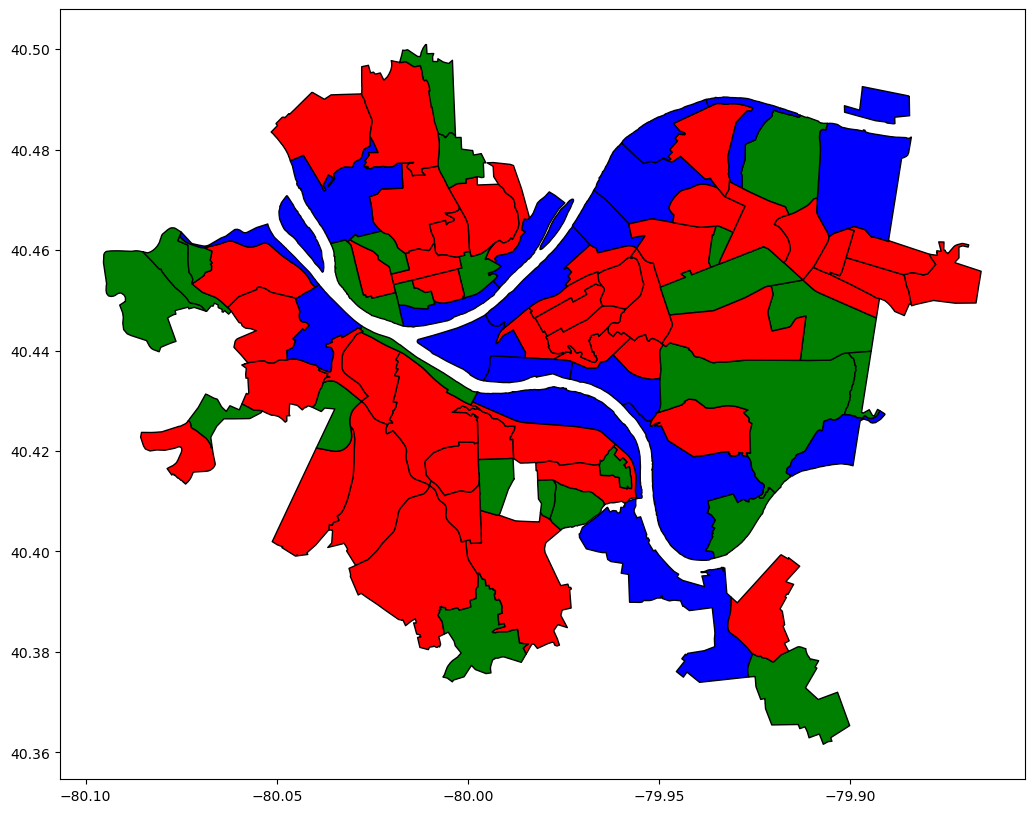

In [129]:
color_map = {"Parks": "green", "Fires": "red", "Water": "blue"}
combined_map["Color"] = combined_map["Dominant Feature"].map(color_map)
combined_map.plot(
    color=combined_map["Color"],
    edgecolor="black",
    legend=False,
    figsize=(15, 10),  
    missing_kwds={"color": "lightgrey"}
)